<a href="https://colab.research.google.com/github/sasumwen/tensorflow-developer-certificate_ZTM/blob/main/01_Neural_Network_Regression_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regression with NN in TF

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.9.2'

### Create data to view and fit

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


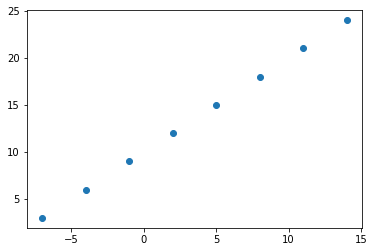

In [4]:
# create features 
X = np.array([-7.0, -4, -1, 2,5,8,11,14])

# createlabels
y = np.array([3.0,6,9,12,15,18,21,24])

# visualize it
plt.scatter(X,y)


## input and output shapes


In [5]:
# create a demo tensor for housing price prediction prob
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
# turn our np into tf
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## steps in modelling in TensorFlow

1. Creating a model - define the input and output layer, as well as the hidden layers of a deep learning model
2. COmpiling a model - define the loss function (in other words, the funciton which tells the model how wrong it is) and th eoptimizer ( tells our model how to improve its learning) and the evaluation metrics (what we can use to interprest the performance of our model)
3. Fitting a model - letting the model try to find patterns between X and y (features and labels)

In [9]:
#  set random see
tf.random.set_seed(84)

#1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2, compile the model
model.compile(loss=tf.keras.losses.mae, #mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # sgd is stochastic gradient descent
              metrics=["mae"])

# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 660ms/step - loss: 11.3754 - mae: 11.3754
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 11.2429 - mae: 11.2429
Epoch 3/5
1/1 [==============================] - 0s 16ms/step - loss: 11.1104 - mae: 11.1104
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9779 - mae: 10.9779
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 10.8454 - mae: 10.8454


In [10]:
# check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [11]:
# try to make pres using the model
model.predict([17])

1/1 [==============================] - 0s 85ms/step


array([[13.344376]], dtype=float32)

## Improving our model